<a href="https://colab.research.google.com/github/arthuralexandre29/Homework-1/blob/master/KRZAKALA_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2
Christian Vanhille

Théo Labarre

Arthur Alexandre

Gabriel Gouraud

Mahmoud Khabou

In [0]:
import  numpy as np
import random as rd
import matplotlib.pyplot as plt
import time 

# Exercise 1 : Sampling discrete distributions

## Question 1 :





In [0]:
n_item=5
n_sampling=1000

def random_distribution(n_item):
    '''creates a probability distribution'''
    r=[]
    for k in range (n_item):
        r.append(rd.uniform(0,1))
    return r/np.sum(r)#one normalizes to get probabilities

p=random_distribution(n_item)

The probabilities are [0.26765069 0.25560881 0.22699428 0.12051495 0.12923128]


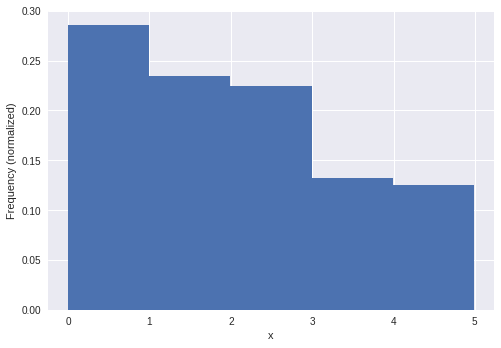

In [8]:
def accept_reject(n_sampling, p):
    ''' sampling n_sampling values using accept reject algorithm'''
    list_sampling=[]
    pmax=np.max(p)
    accepted=0
    while accepted <n_sampling :#we run the algorithm since we didn't get n_sampling values
        x=rd.uniform(0,len(p))
        x_int=int(x)
        if x_int==len(p):
            x_int-=1 #if x_int=n_item (which is very rare, then one returns n_item-1
        y=rd.uniform(0,pmax)
        if y<=p[x_int]:
            list_sampling.append(x)
            accepted+=1
    return list_sampling

print('The probabilities are',p)
plt.hist(accept_reject(n_sampling,p),len(p),density=1)
plt.xlabel('x')
plt.ylabel('Frequency (normalized)')
plt.show()

The values of the histogram are closed to the theoretical values.

## Question 2

The probabilities are [0.26765069 0.25560881 0.22699428 0.12051495 0.12923128]


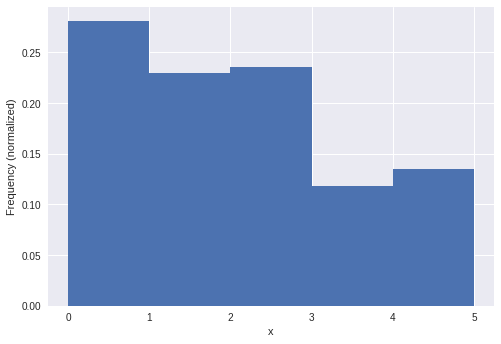

In [9]:
def recherche (sorted_list,x):
    a=0
    b=len(sorted_list)-1
    m=(a+b)//2
    while a<b-1:
        if sorted_list[m]<=x and sorted_list[m+1]>x:
            return(m)
        elif sorted_list[m+1]<=x:
            a=m+1
        elif sorted_list[m]>x:
            b=m
        m=(a+b)//2
    return(a)    

def tower_sampling(n_sampling,p):
    '''tower_sampling algorithm'''
    liste_tower=[]
    sorted_list=np.cumsum(p)
    sorted_list=np.insert(sorted_list,0,0)
    for k in range(n_sampling):
        x=rd.uniform(0,1)
        liste_tower.append(recherche(sorted_list,x))
    return liste_tower

print('The probabilities are',p)

plt.xlabel('x')
plt.ylabel('Frequency (normalized)')
plt.hist(tower_sampling(n_sampling,p),len(p),range=(0,len(p)),density=1)
plt.show()

## Question 3

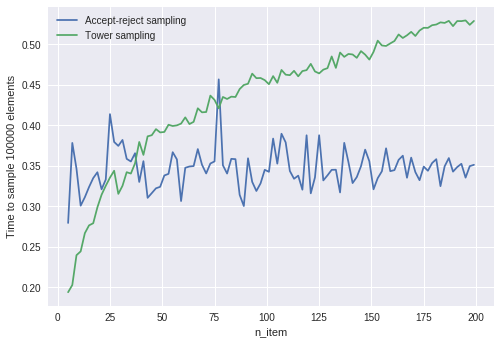

In [10]:
n_sampling=100000
time_AR=[]
time_tower=[]
n_item=np.arange(5,200,2)
for k in range(len(n_item)):
    p=random_distribution(n_item[k])#one creates a probability distribution using a uniform distribution
    t0=time.clock()
    a=tower_sampling(n_sampling,p)
    t1=time.clock()
    time_tower.append(t1-t0)#one computes the time needed by the tower_sampling algorithm
    
    t0=time.clock()
    a=accept_reject(n_sampling, p)#one computes the time needed by the accept_reject algorithm
    t1=time.clock()
    time_AR.append(t1-t0)
                   
    
plt.plot(n_item,time_AR,label='Accept-reject sampling')
plt.plot(n_item,time_tower,label='Tower sampling')
plt.legend()
plt.xlabel('n_item')
plt.ylabel('Time to sample {0} elements'.format(n_sampling))
plt.show()
    

The time needed by Tower sampling algorithm is in $O(log(n_{item}))$ because one uses a dichotomy algorithm. Moreover, one notices that the time needed for Accept reject algorithm remains almost constant when n_item increases because the probabilities are built on a random uniform distribution and one uses $p_{max}$ in the algorithm. The two algorithms have approximately the same efficiency.

## Question 4

In [0]:
def random_distribution_exp(n_item):
    '''creates a probability distribution using exponential function'''
    r=[]
    for k in range (n_item):
        r.append(-np.log(rd.uniform(0,1)))
    return r/np.sum(r)
n_item=5
n_sampling=1000
p=random_distribution_exp(n_item)

The probabilities are [0.00872852 0.43370933 0.36327111 0.12355107 0.07073996]


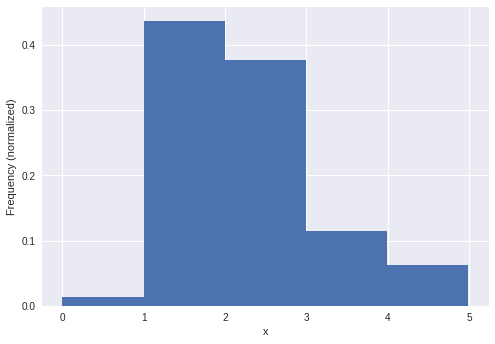

In [12]:
print('The probabilities are',p)

plt.hist(accept_reject(n_sampling,p),len(p),density=1)
plt.xlabel('x')
plt.ylabel('Frequency (normalized)')
plt.show()

The probabilities are [0.00872852 0.43370933 0.36327111 0.12355107 0.07073996]


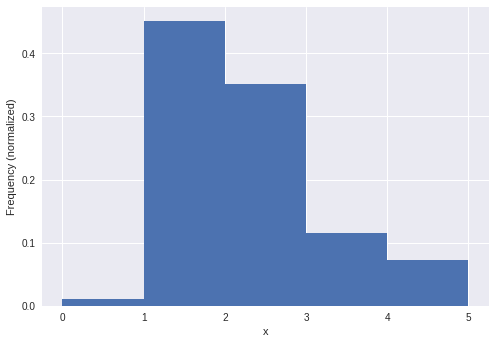

In [13]:
print('The probabilities are',p)

plt.xlabel('x')
plt.ylabel('Frequency (normalized)')
plt.hist(tower_sampling(n_sampling,p),len(p),range=(0,len(p)),density=1)
plt.show()

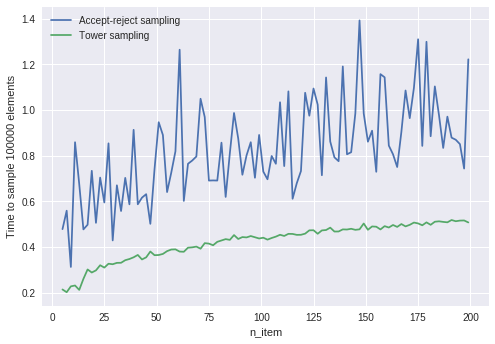

In [14]:
n_sampling=100000
time_AR=[]
time_tower=[]
n_item=np.arange(5,200,2)
for k in range(len(n_item)):
    p=random_distribution_exp(n_item[k])
    
    t0=time.clock()
    a=tower_sampling(n_sampling,p)
    t1=time.clock()
    time_tower.append(t1-t0)
    
    t0=time.clock()
    a=accept_reject(n_sampling, p)
    t1=time.clock()
    time_AR.append(t1-t0)
                   
    
plt.plot(n_item,time_AR,label='Accept-reject sampling')
plt.plot(n_item,time_tower,label='Tower sampling')
plt.legend()
plt.xlabel('n_item')
plt.ylabel('Time to sample {0} elements'.format(n_sampling))
plt.show()

Now, the accept reject is not as efficient as previously because the probability is now created thanks to an exponential distribution. For this algorithm, time grows almost linearly with $n_{item}$ and then becomes constant for $n_{item}$>100. For this distribution, Tower sampling is much more efficient than Accpet reject algorithm.

## Question 5

In [0]:
def random_distribution_root(n_item):
    '''creates a probability distribution using f(x)=1/np.sqrt(x))'''
    r=[]
    for k in range (n_item):
        r.append(1/np.sqrt(rd.uniform(0,1)))
    return r/np.sum(r)
n_item=5
n_sampling=1000
p=random_distribution_root(n_item)

[0.18669138 0.16368817 0.30462552 0.17140258 0.17359235]


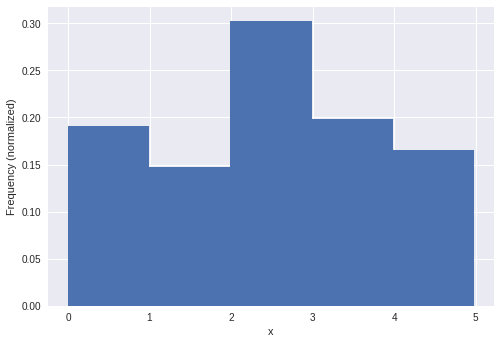

In [16]:
print(p)
plt.hist(accept_reject(n_sampling,p),len(p),density=1)
plt.xlabel('x')
plt.ylabel('Frequency (normalized)')
plt.show()

[0.18669138 0.16368817 0.30462552 0.17140258 0.17359235]


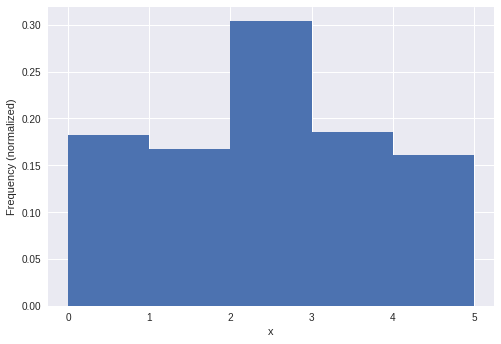

In [17]:
print(p)

plt.xlabel('x')
plt.ylabel('Frequency (normalized)')
plt.hist(tower_sampling(n_sampling,p),len(p),range=(0,len(p)),density=1)
plt.show()

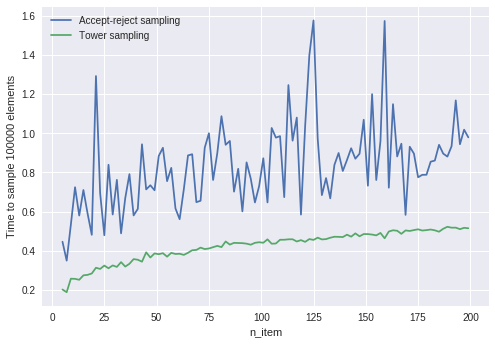

In [18]:
n_sampling=100000
time_AR=[]
time_tower=[]
n_item=np.arange(5,200,2)
for k in range(len(n_item)):
    p=random_distribution_exp(n_item[k])
    
    t0=time.clock()
    a=tower_sampling(n_sampling, p)
    t1=time.clock()
    time_tower.append(t1-t0)
    
    t0=time.clock()
    a=accept_reject(n_sampling, p)
    t1=time.clock()
    time_AR.append(t1-t0)
                   
    
plt.plot(n_item,time_AR,label='Accept-reject sampling')
plt.plot(n_item,time_tower,label='Tower sampling')
plt.legend()
plt.xlabel('n_item')
plt.ylabel('Time to sample {0} elements'.format(n_sampling))
plt.show()

In this case also, the distribution is not uniform and the Tower sampling algorithm is much faster than the Accept reject sampling algorithm. 

# Exercise 1
## Question 1
The probability to measure a pulse at angle $\theta{k}$ is : $$P(\theta_{k},\alpha,\beta)d\theta_{k}=\frac{1}{\pi}d\theta_{k}$$
Then one wants : $P(x_{k},\alpha,\beta)dx_{k}$ One uses the rule to change of variable : 

$P(x_{k},\alpha,\beta)dx_{k}=P(\theta_{k},\alpha,\beta)d\theta_{k}
$ so $$P(x_{k},\alpha,\beta)=P(\theta_{k},\alpha,\beta)\frac{d\theta_{k}}{dx_{k}}$$

We have : $tan(\theta_{k})=\frac{x_{k}-\alpha}{\beta}$ so $\frac{dx_{k}}{\beta}=(1+tan(\theta_{k})^{2})d\theta{k}=(1+(\frac{x_{k}-\alpha}{\beta})^{2})d\theta_{k}$

Finally, one has : $$P(x_{k},\alpha,\beta)=\frac{1}{\pi}\frac{\beta}{\beta^{2}+(x_{k}-\alpha)^{2}}$$. This is known as a Cauchy distribution.

## Question 2

First, one needs to generate data sampled from the Cauchy distribution. Since Python library could only give me a generator of of random numbers from a standard Cauchy distribution ($\alpha=0$, $\beta=1$), I have decide to create my function that samples data from a non-standard Cauchy distribution. The cumulative density function is : $$C_{X}(x)=\frac{1}{\pi}\left(Arctan\left(\frac{x-\alpha}{\beta}\right)+\frac{\pi}{2}\right)$$ with $x\in \mathbb{R}$. Then one can calculate : 
$$C_{X}^{-1}(y)=\beta \tan \left(\pi\left(y-\frac{1}{2}\right)\right) +\alpha$$. To  sample data from a Cauchy distribution, one only needs to choose a random number $0<y<1$ and to calculate $C_{X}^{-1}(y)$.

In [0]:
def cauchy_distribution(n,a,b):
    
    liste_cauchy=[]
    for k in range(n):
        x=rd.uniform(0,1)
        liste_cauchy.append(a+b*np.tan(np.pi*(x-0.5)))
    return liste_cauchy


alpha=30
beta=10
n=10
liste_cauchy=cauchy_distribution(n,alpha,beta)
print('Here are 10 points sampled from the Cauchy distribution : ', liste_cauchy)


In [0]:
alpha=30
beta=10
n=100000
liste_cauchy=cauchy_distribution(n,alpha,beta)

plt.grid()
plt.hist(liste_cauchy,100,density=1,range=(-100+alpha,100+alpha))
plt.title('Histogram of data sampled from a Cauchy distribution \n with alpha={0} and beta={1}'.format(alpha,beta))
plt.show()

## Question 3
The likelihood is defined  as :
$L({x_{k}},\alpha,\beta)=\prod_{k} \frac{1}{\pi}\frac{\beta}{\beta^{2}+(x_{k}-\alpha)^{2}}$ We can also define the log-likelihood :
$$ logL({x_{k}},\alpha,\beta)=\sum_{k} log(\frac{\beta}{\pi})-log({\beta^{2}+(x_{k}-\alpha)^{2}})$$.
The maximum likelihood estimator $\alpha_{ml}$ is obtained when $\frac{\partial logL}{\partial \alpha}_{\alpha=\alpha_{ml}}=0$.
Then one obtained by deriving the previous equation :
$$\alpha_{ml}=\frac{1}{N}\sum_{k}x_k$$

In [0]:
def log_likelihood(liste,a,b):
    '''calculates de likelihood'''
    s=np.log(b/np.pi)
    for k in range (len(liste)):
        s=s-np.log(b**2+(liste[k]-a)**2)
    return s

def alpha_ml(liste):
    s=np.sum(liste)
    return s/len(liste)

In [0]:
alpha_range=np.linspace(-200,200,10000)
alpha=30
beta=10
N=[10,100,200,500,700,1000]

for k in range (len(N)):
    liste_cauchy=cauchy_distribution(N[k],alpha,beta)
    alpha_maxi=alpha_ml(liste_cauchy)
    plt.plot(alpha_range,log_likelihood(liste_cauchy,alpha_range,beta),label='N={0}'.format(N[k]))
    plt.plot(alpha_maxi,log_likelihood(liste_cauchy,alpha_maxi,beta),'b.')
plt.plot(alpha*np.ones(10000),np.linspace(-10000,0,10000))
plt.xlabel('alpha')
plt.ylabel('log likelihood')
plt.legend()
plt.show()

## Question 4

In [0]:
alpha=0
beta=100
N=np.arange(10,1000000,10000)
mean=[]
for k in range (len(N)):
    mean.append(sum(cauchy_distribution(N[k],alpha,beta))/N[k])
plt.plot(N,mean)
plt.plot(N,np.zeros(len(N)))
plt.xlabel('Number of sampled data N')
plt.ylabel('Mean')
plt.show()


It seems that the computed average does not coincide with the posterior. In fact, the mean of a Lorentzian distribution is not defined (the integral diverges). 

# Exercise 3
## Question 1

Let's consider the probability density :
$$P_{\lambda}(x)=\frac{e^{-x/\lambda}}{Z(\lambda)}\text{ if } 1<x<20 $$
$$P_{\lambda}(x)=0 \text{  otherwise} $$
with $$Z(\lambda)=\int_{1}^{20} e^{-x/\lambda}dx=\lambda\left(e^{-\frac{1}{\lambda}} - e^{-\frac{20}{\lambda}}\right) $$

The probability to observe n events {x} is $$P_{\lambda}(\text{{x}})=\prod_{k=1}^{n} \frac{e^{-x_{k}/\lambda}}{Z(\lambda)}=\frac{exp(-\frac{1}{\lambda}\sum_{k=1}^{n} x_{k})}{Z(\lambda)^{n}}$$

The cumulative density function associated to the  probability P is : $$F_{X}(x)=\int_{1}^{x}dx\frac{e^{-x/\lambda}}{Z(\lambda)}= \frac {\lambda}{Z(\lambda)}\left(e^{-\frac{1}{\lambda}} - e^{-\frac{x}{\lambda}}\right) $$ for $1<x<20$. To generate observations sampled from the probability distribution, one computes :
$$F_{X}^{-1}(y)=-\lambda log\left(e^{-1/\lambda}-Z(\lambda)\frac{y}{\lambda}\right)$$ with $0<y<1$. One takes at random a value of y between 0 and 1 uniformly and using this formula, one gets an observation sampled from probability distribution.

In [0]:
def Z(l):
    '''computes the normalization of the probability'''
    return l*(np.exp(-1/l)-np.exp(-20/l))

def generate_positions(lamda,n):
    '''generates positions using the cumulative density function'''
    liste=[]
    for k in range(n):
        x=rd.uniform(0,1)
        liste.append(-lamda*np.log(np.exp(-1/lamda)-Z(lamda)*x/lamda))
    return liste

## Question 2
The likelihood is defined as : $$L(\lambda)=P_{\lambda}(\text{{x}})=\prod_{k=1}^{n} \frac{e^{-x_{k}/\lambda}}{Z(\lambda)}=\frac{exp(-\frac{1}{\lambda}\sum_{k=1}^{n} x_{k})}{Z(\lambda)^{n}}$$. Since this quantity is very small compared to 1, we usually computes the log likelihood :$$logL(\lambda)=-\frac{\sum_{k=1}^{n} x_{k}}{\lambda}-n\log{Z(\lambda)}$$

In [0]:
def logL(liste,l):
    '''computes the log likelihood'''
    return -np.sum(liste)/l-len(liste)*np.log(Z(l))


n=[10,100,1000]
l_star=10#true value of lambda
for k in range (len(n)):
    exp_list=generate_positions(l_star,n[k])
    l=np.linspace(1,100,100000)
    plt.semilogx(l,logL(exp_list,l),label='n={0}'.format(n[k]))
plt.legend()
plt.xlabel('$\lambda$')
plt.ylabel('$logL(\lambda)$')
plt.grid()
plt.show()
    

The more data are generated, the sharper is the maximum of the log-likelihood. 

## Question 3

We consider the maximum loglikelihood estimator : $$\hat{\lambda}_{ML}(\text{{x}})=argmax_{\lambda}P_\lambda(\text{{x}})$$ We want to determine this $\lambda_{ML}$. In fact, we have $\frac {\partial logL}{\partial \lambda}_{\lambda=\lambda_{ML}}=0$ So one need to find $\lambda=\lambda_{ML}$ such that : $$\frac{\sum_{k=1}^{n} x_{k}}{\lambda^{2}}-n\left(\frac{1}{\lambda}+\frac{\frac{1}{\lambda^2}e^{-1/\lambda}-\frac{20}{\lambda^2}e^{-20/\lambda}}{e^{-1/\lambda}-e^{-20/\lambda}}\right)=0$$ This equation is really ugly but we can compute it numerically to find $\lambda_{ML}$ for a given set of observation {x}.

In [0]:
def deriv_logL(l,liste):
    '''calculates the derivative of the log likelihood'''
    return sum(liste)/l**2-len(liste)*(1/l+(np.exp(-1/l)/l**2-20/l**2*np.exp(-20/l))/(np.exp(-1/l)-20/l**2*-np.exp(-20/l)))

def deriv(x,fonc,liste):
    '''calculates the derivative of a fonction fonc at point x'''
    h=1e-3
    return (fonc(x+h,liste)-fonc(x,liste))/h

def newton(fonc,liste,x0):
    '''newton algorithm to calculate the zero of a fonction near x0'''
    eps=1e-5
    x=x0
    while abs(fonc(x,liste))>eps :
        x=x-fonc(x,liste)/deriv(x,fonc,liste)#newton algorithm
    return x

def max_likelihood(exp_list):
    '''calulates the maximum likelihood using the derivative of the log likelihood newton algorithm '''
    x0=0.5
    lambda_ML=newton(deriv_logL,exp_list,x0)
    return lambda_ML

l_star=[5,10,20]
n=np.arange(10,1000,10)
for k in range (len(l_star)):
    y=[]
    for j in range(len(n)):
        exp_list=exp_list=generate_positions(l_star[k],n[j])
        y.append(max_likelihood(exp_list))
    plt.plot(n,y,label='lambda* ={0}'.format(l_star[k]))
plt.legend()
plt.xlabel('Number of observations n')
plt.ylabel('$\lambda_{ML}$')
plt.grid()
plt.show()



One notices that the fluctuations around the mean decrease when n gets bigger. Also, one observes that $\lambda^{*}-\lambda_{ML}$ increases when $\lambda^{*}$ increases.

## Question 4 

In [5]:
def MSE(l_star,exp_list):
    '''computes the mean square error'''
    return (max_likelihood(exp_list)-l_star)**2

def Fisher(l_star,exp_list):
    s=0
    for k in range(len(exp_list)):
        s+=(exp_list[k]/l_star**2-(1/l_star+(np.exp(-1/l_star)/l_star**2-20/l_star**2*np.exp(-20/l_star))/(np.exp(-1/l_star)-np.exp(-20/l_star))))**2*np.exp(-exp_list[k]/l_star)/Z(l_star)
    return s

n=50000
l_star=np.linspace(0.5,10,200)

mean_square=[]
fisher_inverse=[]

for k in range (len(l_star)):
    exp_list=generate_positions(l_star[k],n)
    mean_square.append(MSE(l_star[k],exp_list))
    fisher_inverse.append(1/Fisher(l_star[k],exp_list))
    
plt.plot(l_star,mean_square)
plt.plot(l_star,fisher_inverse)
plt.xlabel('$\lambda^{*}$')
plt.ylabel('Mean square error')
plt.grid()
plt.show()

NameError: ignored